# Project 4, APS1070 Summer 2022
#### **Linear Regression -  15 points**
**Deadline: August 13th, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Your **name**: Yusuf Olonade
*   Your **student number**: 1006814743



### How to submit **(HTML [This notebook] + IPYNB + GitHub [Part 7])**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files for this notebook on Quercus for grading.

7. Make sure you compeleted the last part on <font color='red'>**GitHub**</font> and added your link to the last cell here. The teaching team will view and grade your part 7 on GitHub.



Ref: https://stackoverflow.com/a/64487858 



## Part 1 - Getting Started [1 marks]

Ailerons are small hinged sections on the outboard portion of a wing used to control the roll of an airplane. In this project, we are going to design a controller to manage the ailerons of an aircraft based on supervised learning.

![Aileron](https://www.eecg.utoronto.ca/~hadizade/APS1070/p3Ar.jpg)




The following dataset contains 13750 instances, where each instance is a set of 40 features describing the airplane's status. Our goal is to use these features to predict the `Goal` column, which is a command that our controller should issue. We will make our predictions by implementing linear regression.

In [127]:
import pandas as pd
import numpy as np

df=pd.read_csv("https://raw.githubusercontent.com/aps1070-2019/datasets/master/F16L.csv" , skipinitialspace=True)

Here are the steps to complete this portion:

1. Print the dataframe.
2. Prepare your dataset as follows: **[0.5]**
  *   Using `train_test_split` from Sklearn, split the dataset into training, validation, and test sets ($70\%$ training, $15\%$ validation, and $15\%$ test). When splitting, set `random_state=1`.
  *   Standardize the data using `StandardScaler` from sklearn. 
  *   Insert the first column of all $1$s in the training, validation, and test set.
 
3. Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)? **[0.5]**

In [128]:
#1
df

,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,...,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se,Goal
0,-17,-6,-0.03,0.14,0.59,-0.5,-11,-9,0.015,-0.2,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.6,0.021,-0.0008
1,-791,15,-0.28,-0.34,1.11,0.9,-10,27,-0.002,4.7,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.4,0.013,-0.0009
2,-46,48,-0.42,0.07,0.57,0.6,-5,-8,-0.008,0.0,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.019,-0.0005
3,496,-5,-0.21,-0.04,0.03,-0.5,-7,6,-0.002,-0.1,...,0.0,0.000,0.0,0.001,0.0,0.001,0.0,0.5,0.017,-0.0005
4,-124,16,-0.02,0.05,0.61,-0.2,-9,-3,0.000,0.0,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.018,-0.0006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13745,-53,-13,-0.07,0.02,0.58,-2.3,-15,12,0.022,-0.8,...,0.0,0.000,0.0,0.000,0.0,-0.001,0.0,0.5,0.019,-0.0007
13746,1,4,-0.11,-0.07,0.47,0.8,-5,8,-0.003,-0.2,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.016,-0.0004
13747,425,-14,0.40,0.07,0.41,-2.1,-16,12,0.031,-0.7,...,0.0,0.001,0.0,0.000,0.0,0.001,0.0,0.9,0.032,-0.0015
13748,102,-10,-0.19,0.08,1.30,0.5,-10,-3,-0.003,-0.2,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,1.4,0.051,-0.0015


In [129]:
#2 Splitting the df into train_valid_test set
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]       # Feature data
y = df.iloc[:,-1]        # Target data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state = 1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15/0.85, random_state = 1)

In [130]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_valid shape: {X_valid.shape}")
print(f"y_valid shape: {y_valid.shape}")
print(f"X_test shape:  {X_test.shape}")
print(f"y_test shape:  {y_test.shape}")

X_train shape: (9624, 40)
y_train shape: (9624,)
X_valid shape: (2063, 40)
y_valid shape: (2063,)
X_test shape:  (2063, 40)
y_test shape:  (2063,)


In [131]:
# Standardizing the dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled  = scaler.transform(X_test)

In [132]:
# Inserting a column of 1 in the dataset

one_train = np.ones(X_train_scaled.shape[0]).reshape(-1, 1)
one_valid = np.ones(X_valid_scaled.shape[0]).reshape(-1, 1)
one_test = np.ones(X_test_scaled.shape[0]).reshape(-1, 1)
X_train_scaled_1f = np.hstack((one_train, X_train_scaled))
X_valid_scaled_1f = np.hstack((one_valid, X_valid_scaled))
X_test_scaled_1f = np.hstack((one_test, X_test_scaled))

In the gradient descent algorithm, epoch is the number of times the model is trained with the full dataset while iteration is the number of times the weights are updated. In a mini-batch gradient descent algorithm, the whole dataset is split into n-batches. In a single iteration, the model is trained with a batch and the weights are updated. The number of iterations is equal to the number of batches while one epoch is equal to n-iterations. For example if the whole dataset is split into 5 batches;
*   No of iterations (weight updates) = 5
*   1 epoch = 5 iterations




## Part 2 - Linear Regression Using Direct Solution [1 marks]

Implement the direct solution of the linear regression problem on the training set. **[0.5]**

**Note:** You should use **``scipy.linalg.inv``** to perform the matrix inversion, as ``numpy.linalg.inv`` may cause numerical issues.

Report the root-mean-square error (RMSE) for both the training and validation sets. **[0.5]**

You may use `mean_squared_error` from Sklearn for computing the RMSE.

In [133]:
# Target array
y_train_array = y_train.values.reshape(-1, 1)
y_valid_array = y_valid.values.reshape(-1, 1)
y_test_array = y_test.values.reshape(-1, 1)

In [134]:
# Defining the error function
from sklearn.metrics import mean_squared_error
def rmse(yPred, y):
    return np.sqrt(mean_squared_error(yPred, y))

In [135]:
# Implementation of direct solution
from scipy import linalg
W = np.dot(linalg.inv(np.dot(X_train_scaled_1f.T, X_train_scaled_1f)), np.dot(X_train_scaled_1f.T, y_train_array)) # Training the model to obtain weights
yPred_train = np.dot(X_train_scaled_1f, W) # prediction on the training set
yPred_valid = np.dot(X_valid_scaled_1f, W) # prediction on the validation set
RMSE_train_direct = rmse(yPred_train, y_train_array)             
RMSE_valid_direct = rmse(yPred_valid, y_valid_array)
print ("RMSE on training set: " , RMSE_train_direct)
print ("RMSE on validation set: " , RMSE_valid_direct)

RMSE on training set:  0.0005663942686278687
RMSE on validation set:  0.0005485775858757549


## Part 3 - Full Batch Gradient Descent [2 marks]

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is,
 $$w_t = w_{t-1} - \alpha~g_t$$ where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire data. 

Here are the steps for this part:

* Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.01$, and iterate until your model's **validation** RMSE converges. 

  We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.001 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you calculated in the previous part. 

  We refer to the quantity $RMSE_\text{Direct Solution}\times 1.001$ as the convergence threshold (CT).

*  Record the training time (from the first iteration until convergence) using the `time.time()` function. Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial. **[0.5]**

* Plot the training RMSE and the validation RMSE vs. epoch on the same figure.  **[0.5]**

* Comment on overfitting/underfitting by observing the training and validation RMSE **[1]**

**Hint**: Initialize your weights with small random numbers (<$0.001$)

--- Total Training Time: 0.1637270450592041 (s) ---
Converged validation RMSE: 0.0005481458908866772


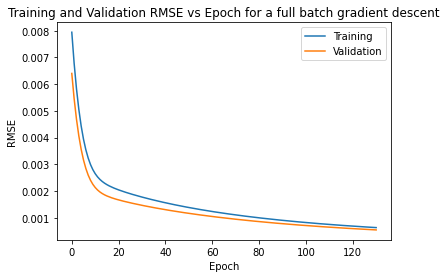

In [136]:
import time
import matplotlib.pyplot as plt

np.random.seed(2)
w_min = 0.001
w = w_min * (np.random.random(X_train_scaled_1f.shape[1])).reshape(1,-1)     # Inital weights in 2D array
lr = 0.01                                                    
CT = RMSE_valid_direct * 1.001                                               # Convergence threshold
rmse_valid = 0.1 + CT                                                        # Intialize rmse_valid above CT
rmse_array_train = []
rmse_array_valid = []

start_time = time.time()                                                     # Records current time
while rmse_valid > CT:
  yPred_train = np.dot(X_train_scaled_1f, w.T)
  rmse_train = rmse(yPred_train, y_train_array)
  rmse_array_train.append(rmse_train)
  gradient = (1/len(yPred_train) * np.dot(X_train_scaled_1f.T, yPred_train - y_train_array)).reshape(1,-1)
  w = w - lr * gradient                                                      # Weight update
  yPred_valid = np.dot(X_valid_scaled_1f, w.T)
  rmse_valid = rmse(yPred_valid, y_valid_array)
  rmse_array_valid.append(rmse_valid)

print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))
print(f'Converged validation RMSE: {rmse_array_valid[-1]}')
plt.plot(rmse_array_train, label='Training')
plt.plot(rmse_array_valid, label='Validation')
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.title("Training and Validation RMSE vs Epoch for a full batch gradient descent")
plt.legend()
plt.show()

The model is neither overfitted nor underfitted because at every interation the RMSE for the training and validation set are very close

## Part 4 - Mini-batch and Stochastic Gradient Descent [4 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[1]**

The inputs of that function are: 
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays: 
 * The final weights after training.
 * The training RMSE at each epoch.
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes: 
* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged. 
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch. Hint: use `np.random.permutation`. 

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 5 values that **converge**), each time using a learning rate of $\alpha= 0.01$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,64,128...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[0.5]**

Provide the following $3$ plots:
  1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[0.5]**
  3. Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**

Describe your findings, including the main takeaways from each of your plots. **[1]**

In [137]:
import time
import matplotlib.pyplot as plt

def gradient_descent(X_train_scaled_1f, y_train_array, X_valid_scaled_1f, y_valid_array, CT, b, lr):
  np.random.seed(2)
  w_min = 1 / 10000
  w = w_min * (np.random.random(X_train_scaled_1f.shape[1])).reshape(1,-1)            
  rmse_valid = 0.1 + CT                                       
  rmse_array_train = []
  rmse_array_valid = []
  elapsed_time_epoch = []
  batch_size_array = np.arange(0, X_train_scaled_1f.shape[0] , b)          # Creates mini-batch array
 
  start_time = time.time()                                                 # Records start time
  while rmse_valid > CT:                                                   # Iterates through epoch
    for i in batch_size_array:                                             # Iterates through n_batches, a complete iteration forms an epoch
      yPred_batch = np.dot(X_train_scaled_1f[i:i+b], w.T)
      gradient = (1/len(yPred_batch) * np.dot(X_train_scaled_1f[i:i+b].T, (yPred_batch - y_train_array[i:i+b]))).reshape(1,-1)
      w = w - lr * gradient
    yPred_train = np.dot(X_train_scaled_1f, w.T)    
    rmse_train = rmse(yPred_train, y_train_array)  
    rmse_array_train.append(rmse_train)
    yPred_valid = np.dot(X_valid_scaled_1f, w.T)
    rmse_valid = rmse(yPred_valid, y_valid_array)
    rmse_array_valid.append(rmse_valid)
    stop_time = time.time()
    elapsed_time = stop_time - start_time
    elapsed_time_epoch.append(elapsed_time)

    # Convergence check
    if len(rmse_array_valid) > 7 and rmse_array_valid[-1] > rmse_array_valid[-8]:
      return "Diverging"
    else:
      full_data = np.hstack((X_train_scaled_1f, y_train_array))   
      full_data_shuffle = np.random.permutation(full_data)            # Shuffles dataset at the end of each epoch
      X_train_scaled_1f = full_data_shuffle[:, :-1]
      y_train_array = full_data_shuffle[:, -1].reshape(-1, 1)  
  return w, rmse_array_train, rmse_array_valid, elapsed_time_epoch

In [138]:
gradient_descent(X_train_scaled_1f, y_train_array, X_valid_scaled_1f, y_valid_array, CT, 2**0, 0.01)

'Diverging'

In [139]:
gradient_descent(X_train_scaled_1f, y_train_array, X_valid_scaled_1f, y_valid_array, CT, 2**1, 0.01)

'Diverging'

In [140]:
gradient_descent(X_train_scaled_1f, y_train_array, X_valid_scaled_1f, y_valid_array, CT, 2**2, 0.01)

'Diverging'

In [141]:
# Selected batch sizes for investigation
Result_1 = gradient_descent(X_train_scaled_1f, y_train_array, X_valid_scaled_1f, y_valid_array, CT, 2**8, 0.01)
Result_1

(array([[-4.46624153e-04, -1.23507365e-05,  3.95787403e-05,
         -4.91907778e-05,  2.15122246e-05,  1.39866843e-05,
         -1.72919186e-05,  1.57173796e-04,  1.14442239e-05,
          2.86454872e-05,  4.13399033e-05, -1.25932674e-05,
         -5.00529533e-05, -1.21549904e-05, -4.48431004e-05,
          1.53138819e-05,  2.33564236e-05, -1.24076744e-05,
          2.42957966e-05, -5.23590546e-05, -7.62793888e-06,
         -5.13940166e-05, -1.28885449e-05, -4.57579495e-05,
         -4.07952240e-05,  2.17855509e-05,  2.23237625e-05,
         -3.42539496e-07, -9.67942452e-06,  9.04735962e-06,
          1.13267479e-05, -6.15798699e-06,  1.33739915e-05,
          1.06763484e-05,  2.42969818e-05,  4.11030565e-06,
          2.93047858e-05,  2.30630658e-05, -1.04606747e-05,
          1.72174527e-05,  4.30067656e-05]]),
 [0.0006834883774365876, 0.00048420047989677],
 [0.0006754519611373038, 0.0004782645715511352],
 [0.00745701789855957, 0.014957904815673828])

In [142]:
Result_2 = gradient_descent(X_train_scaled_1f, y_train_array, X_valid_scaled_1f, y_valid_array, CT, 2**9, 0.01)
Result_2

(array([[-4.46509321e-04, -1.22889827e-05,  3.96591468e-05,
         -4.95944670e-05,  2.10079218e-05,  1.39728328e-05,
         -1.67577759e-05,  1.57247008e-04,  1.17648683e-05,
          2.85094676e-05,  4.12934344e-05, -1.26354957e-05,
         -5.01117368e-05, -1.22143258e-05, -4.48899176e-05,
          1.52631432e-05,  2.33070607e-05, -1.24676203e-05,
          2.42194517e-05, -5.24419676e-05, -7.68756706e-06,
         -5.14715966e-05, -1.29428343e-05, -4.58247162e-05,
         -4.08160900e-05,  2.21504629e-05,  2.26989050e-05,
         -3.33630794e-07, -7.34493042e-06,  9.16631066e-06,
          1.22059420e-05, -6.30134733e-06,  1.86549394e-05,
          1.04906450e-05,  2.61494225e-05,  3.87688824e-06,
          3.13335265e-05,  2.30377110e-05, -8.74641943e-06,
          1.71547549e-05,  4.29836478e-05]]),
 [0.0008221296924694576,
  0.0006841791312031065,
  0.0005736831005177906,
  0.0004847807006871533],
 [0.0008105807548901266,
  0.0006755406828606446,
  0.0005665926560584375

In [143]:
Result_3 = gradient_descent(X_train_scaled_1f, y_train_array, X_valid_scaled_1f, y_valid_array, CT, 2**10, 0.01)
Result_3

(array([[-4.20058376e-04, -1.28738771e-05,  4.08659250e-05,
         -4.53357015e-05,  2.12973047e-05,  1.42830575e-05,
         -1.35552956e-05,  1.52945430e-04,  1.31239624e-05,
          2.75494143e-05,  4.25732899e-05, -1.22950492e-05,
         -4.98738677e-05, -1.19780824e-05, -4.46303205e-05,
          1.55194822e-05,  2.35589214e-05, -1.22324849e-05,
          2.44010401e-05, -5.22642922e-05, -7.50978017e-06,
         -5.13119003e-05, -1.28706906e-05, -4.57760720e-05,
         -4.08150277e-05,  2.43053003e-05,  2.38141055e-05,
         -4.99600510e-07, -5.16624989e-06,  9.42000602e-06,
          1.48790932e-05, -5.32639126e-06,  2.33451275e-05,
          1.13047339e-05,  2.80602704e-05,  4.76384158e-06,
          3.54927918e-05,  2.47191832e-05, -6.24800616e-06,
          1.70335850e-05,  4.29792522e-05]]),
 [0.0009095155832485902,
  0.0008147732769347337,
  0.0007389831394430484,
  0.0006717734052606647,
  0.0006120417819727615,
  0.0005586516235877142,
  0.000511079940609861],

In [144]:
Result_4 = gradient_descent(X_train_scaled_1f, y_train_array, X_valid_scaled_1f, y_valid_array, CT, 2**11, 0.01)
Result_4

(array([[-3.96551583e-04, -1.32522178e-05,  4.19960943e-05,
         -4.05786242e-05,  2.13180039e-05,  1.44100243e-05,
         -1.12585222e-05,  1.49221889e-04,  1.42968581e-05,
          2.70345539e-05,  4.43774542e-05, -1.20739875e-05,
         -4.97444572e-05, -1.18488583e-05, -4.45011170e-05,
          1.56480635e-05,  2.36245163e-05, -1.21692249e-05,
          2.44091004e-05, -5.22581676e-05, -7.64807514e-06,
         -5.14506302e-05, -1.30606320e-05, -4.59734054e-05,
         -4.10647987e-05,  2.59464194e-05,  2.39443941e-05,
         -5.83993934e-08, -4.91167291e-06,  1.08181221e-05,
          1.51815998e-05, -4.13067145e-06,  2.44490980e-05,
          1.33912989e-05,  2.82843919e-05,  5.74474351e-06,
          3.70109657e-05,  2.57786994e-05, -4.80327651e-06,
          1.69532872e-05,  4.27279699e-05]]),
 [0.0010237607114365237,
  0.0009125294703364637,
  0.000857834751326527,
  0.0008146379017201306,
  0.0007755879486411577,
  0.0007388235395403121,
  0.0007043645177578778,


In [145]:
Result_5 = gradient_descent(X_train_scaled_1f, y_train_array, X_valid_scaled_1f, y_valid_array, CT, 2**12, 0.01)
Result_5

(array([[-3.87298490e-04, -1.35057340e-05,  4.23796595e-05,
         -3.90423143e-05,  2.09880810e-05,  1.43918383e-05,
         -1.07115933e-05,  1.47999136e-04,  1.50805049e-05,
          2.71374236e-05,  4.47220307e-05, -1.23213525e-05,
         -5.00335190e-05, -1.21385169e-05, -4.48027469e-05,
          1.53459665e-05,  2.33497102e-05, -1.24357908e-05,
          2.41067636e-05, -5.25619929e-05, -7.99311037e-06,
         -5.17906177e-05, -1.33913126e-05, -4.63285335e-05,
         -4.14693331e-05,  2.68606785e-05,  2.43446753e-05,
          1.19190349e-07, -5.75781238e-06,  1.06279335e-05,
          1.34524413e-05, -3.24722198e-06,  2.36373286e-05,
          1.40899710e-05,  2.81345926e-05,  5.77492929e-06,
          4.10225433e-05,  2.68063392e-05, -2.55762950e-06,
          1.65966381e-05,  4.23199107e-05]]),
 [0.0011130233358193583,
  0.0009886352860912116,
  0.0009269827753503225,
  0.0008876172159554707,
  0.000857770254786151,
  0.0008309337358581687,
  0.0008064615836081098,


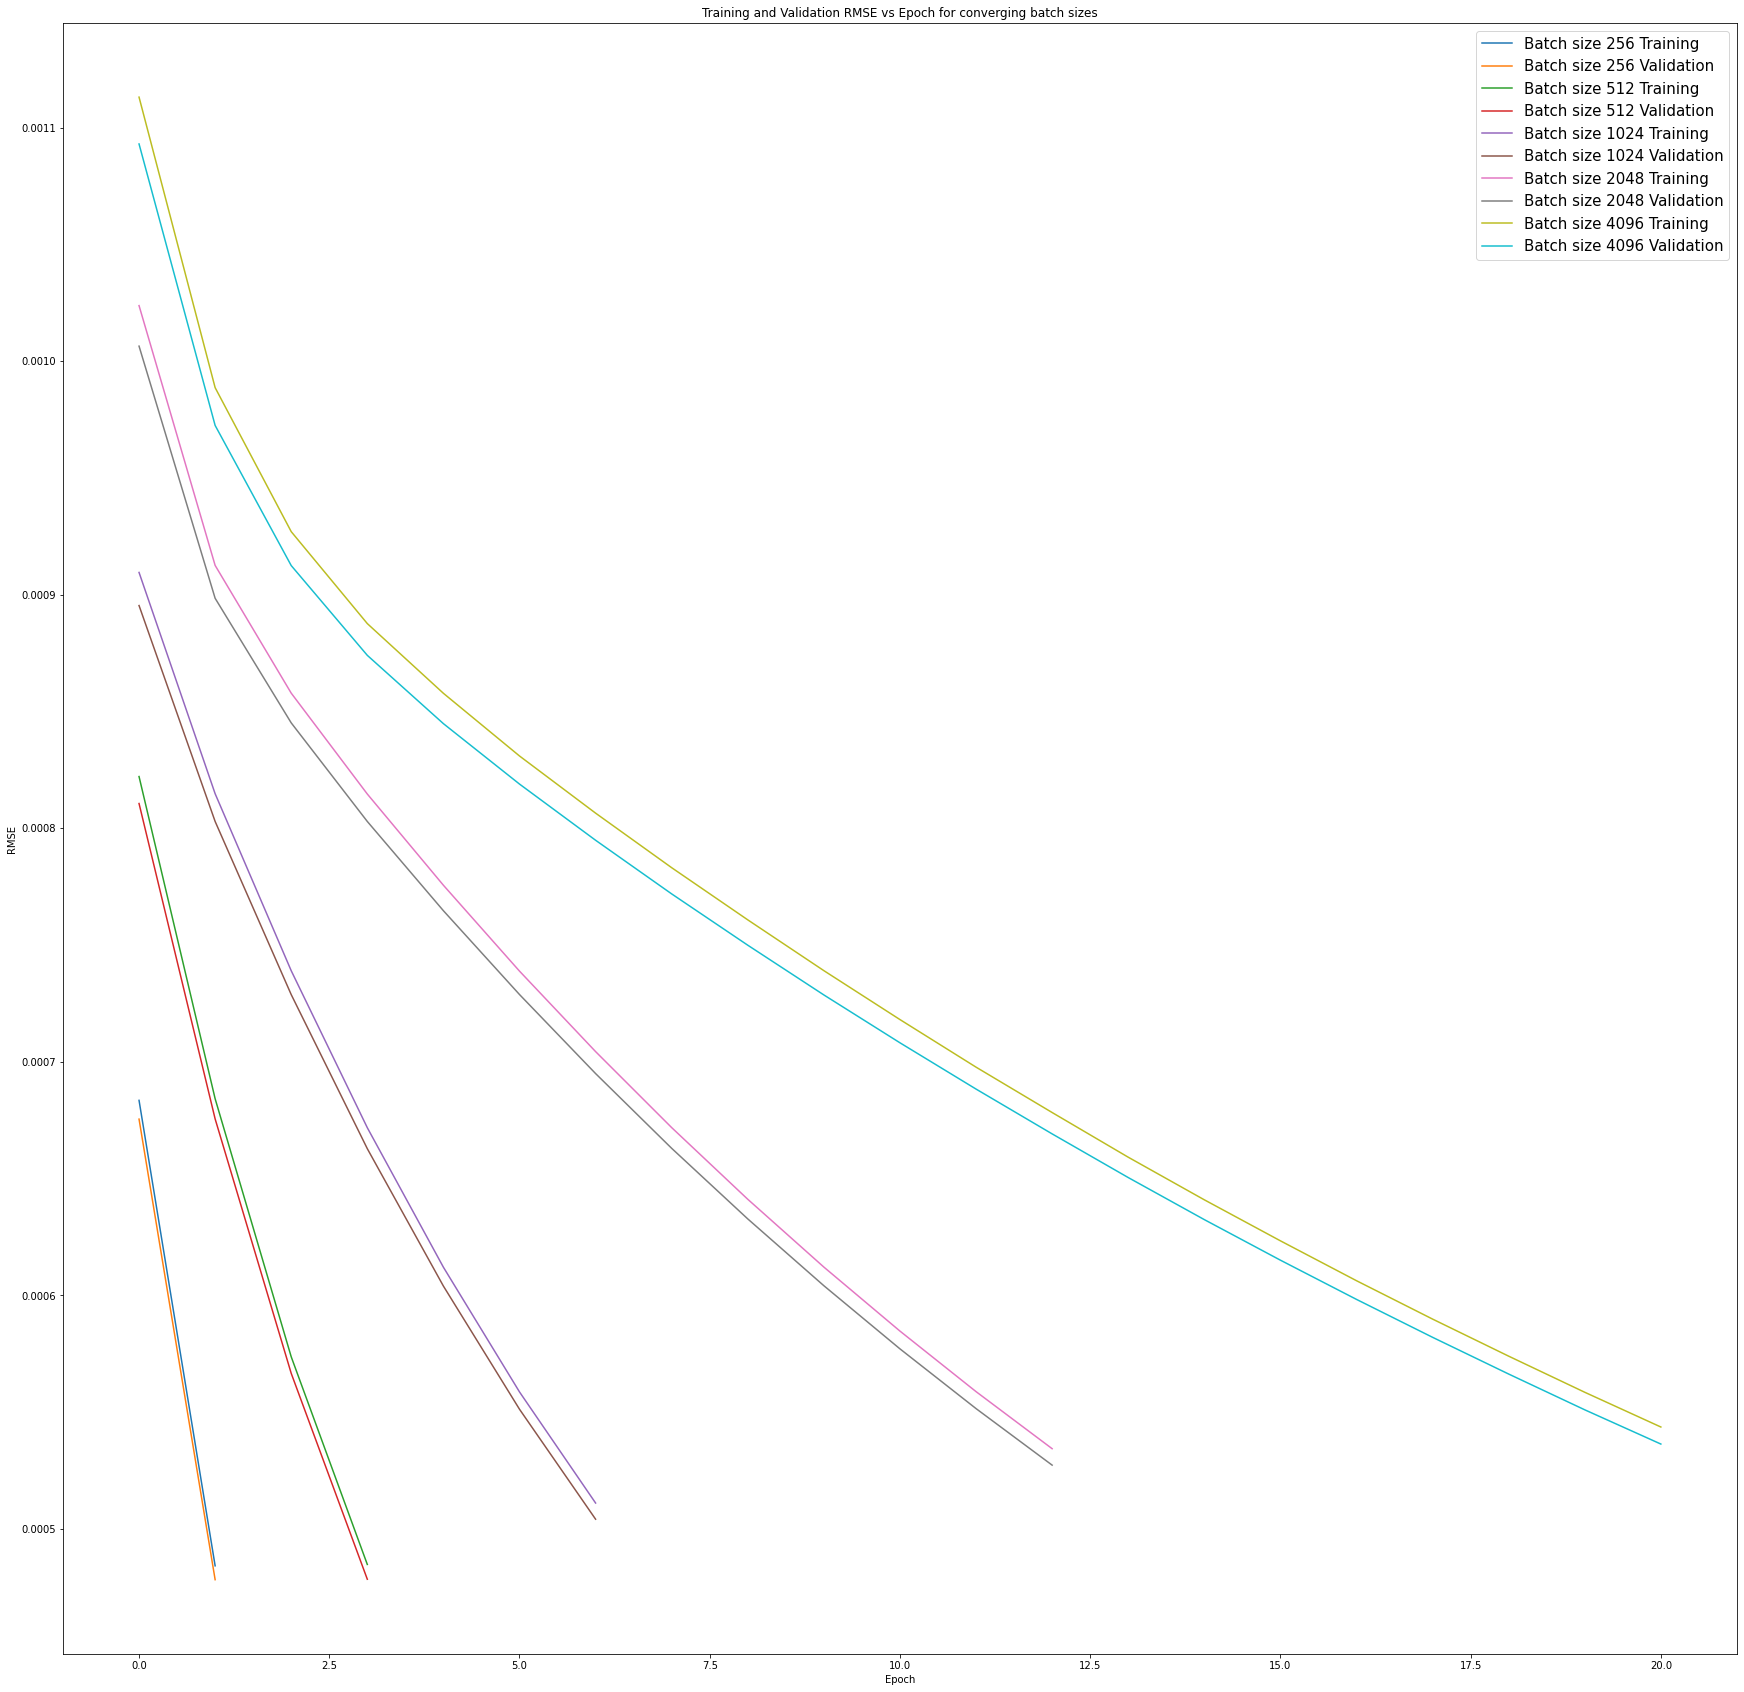

In [146]:
# Plot 1: Training and validation RMSE vs Epoch for the converging batch sizes
import matplotlib.pyplot as plt

plt.figure(figsize=(30,30))
plt.plot(Result_1[1], label='Batch size 256 Training')
plt.plot(Result_1[2], label='Batch size 256 Validation')
plt.plot(Result_2[1], label='Batch size 512 Training')
plt.plot(Result_2[2], label='Batch size 512 Validation')
plt.plot(Result_3[1], label='Batch size 1024 Training')
plt.plot(Result_3[2], label='Batch size 1024 Validation')
plt.plot(Result_4[1], label='Batch size 2048 Training')
plt.plot(Result_4[2], label='Batch size 2048 Validation')
plt.plot(Result_5[1], label='Batch size 4096 Training')
plt.plot(Result_5[2], label='Batch size 4096 Validation')
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.title("Training and Validation RMSE vs Epoch for converging batch sizes")
plt.legend()
plt.legend(fontsize=15)
plt.show()


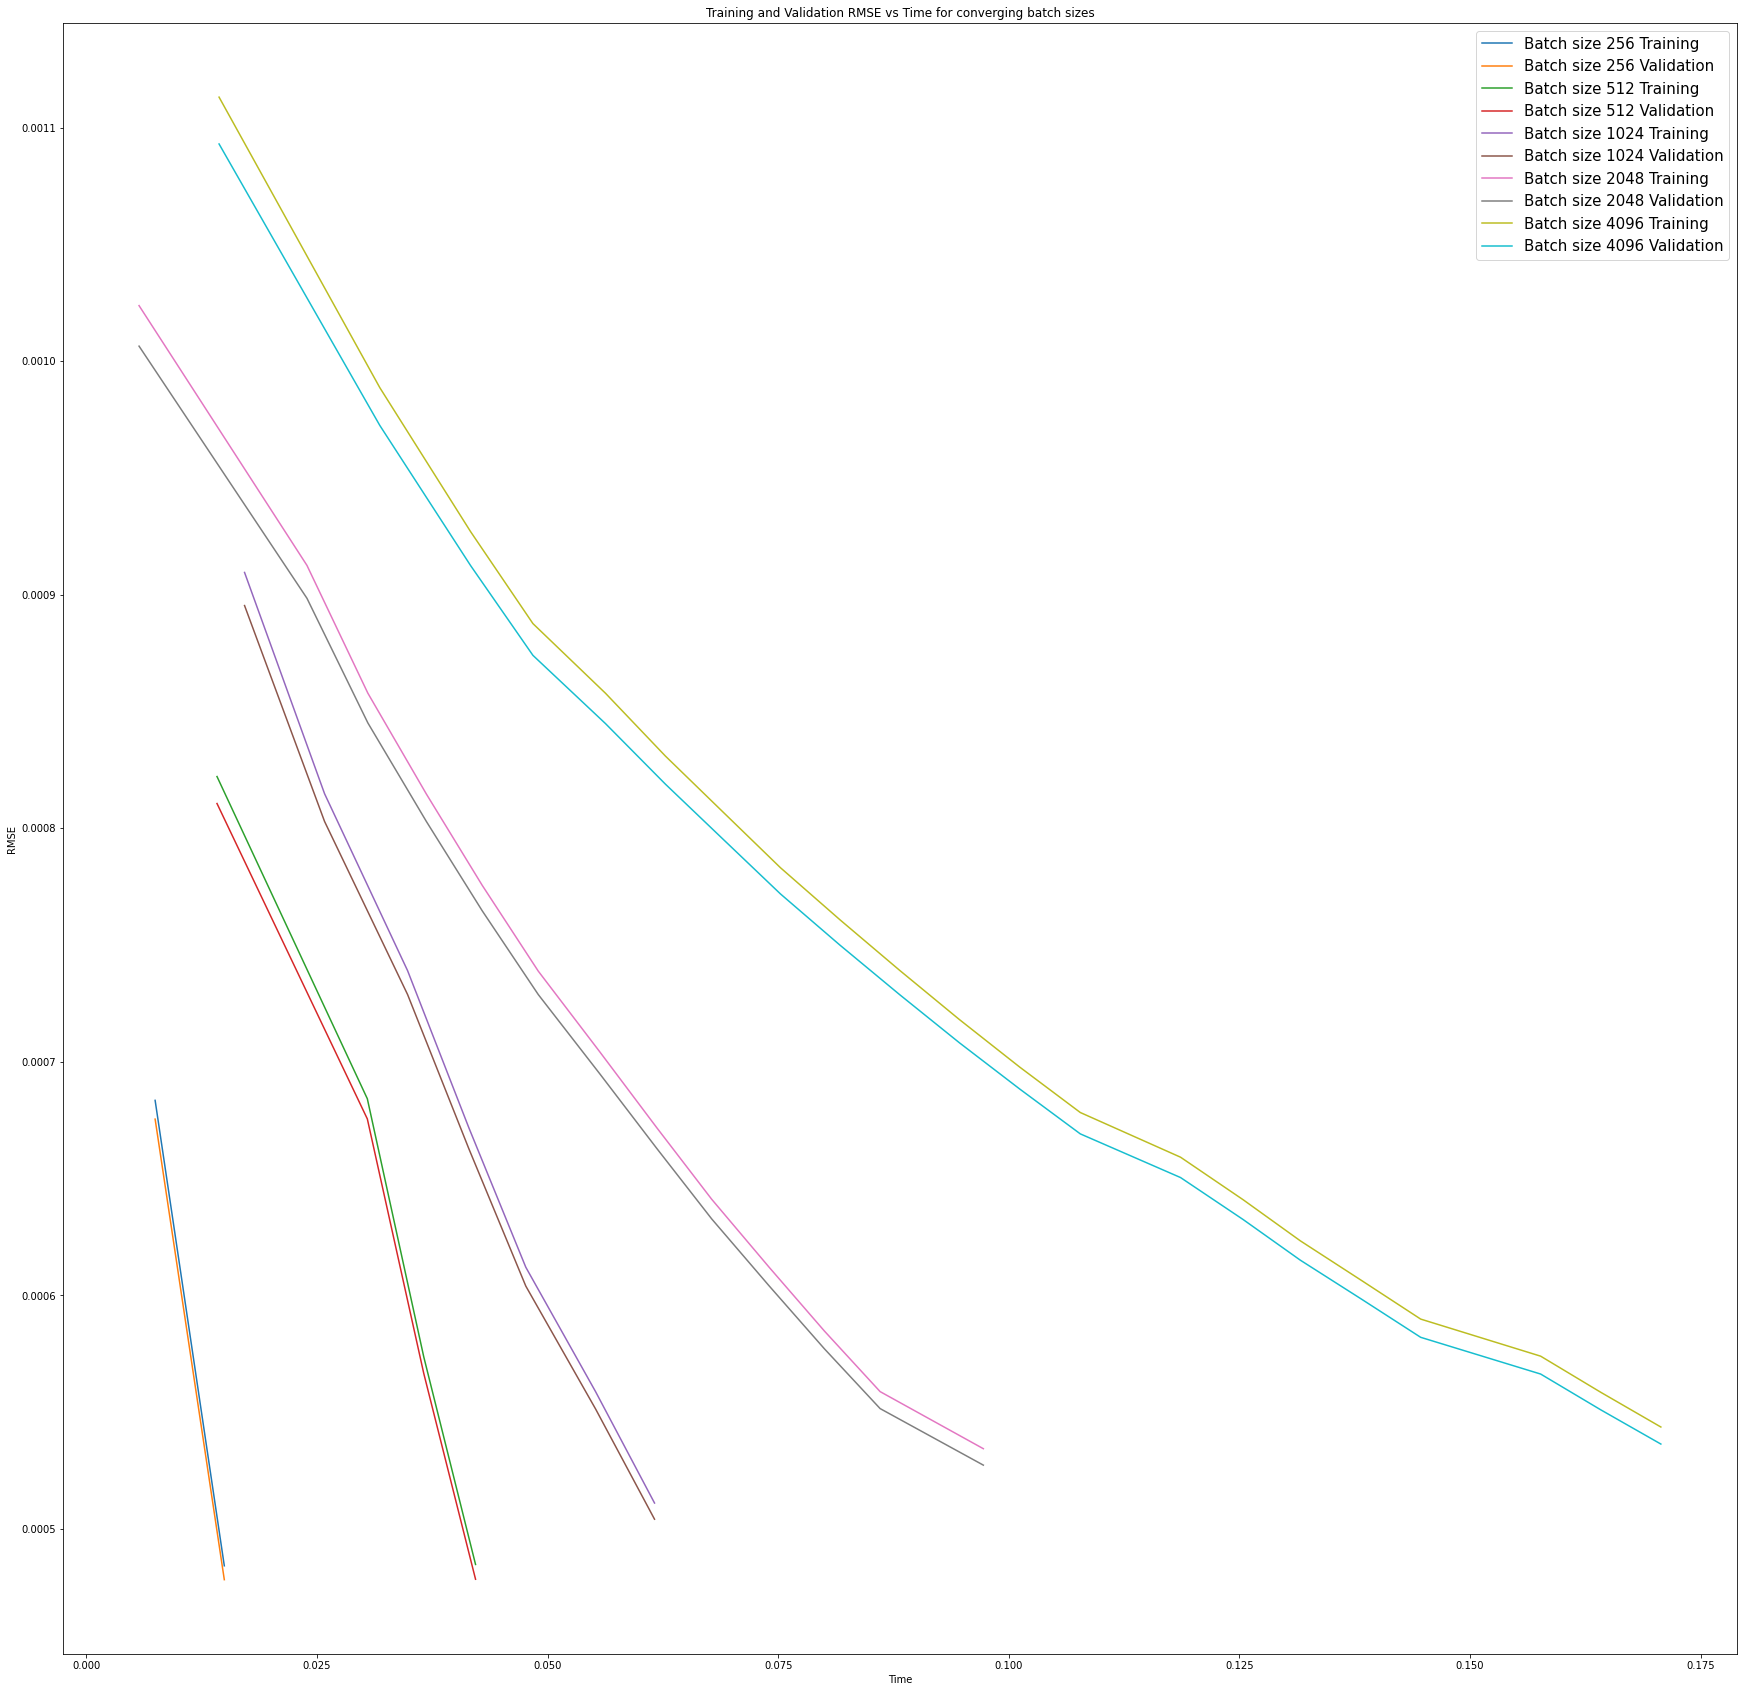

In [147]:
# Plot 2: Training and validation RMSE vs Time for converging batch sizes
import matplotlib.pyplot as plt

plt.figure(figsize=(30,30))
plt.plot(Result_1[3], Result_1[1], label='Batch size 256 Training')
plt.plot(Result_1[3], Result_1[2], label='Batch size 256 Validation')
plt.plot(Result_2[3], Result_2[1], label='Batch size 512 Training')
plt.plot(Result_2[3], Result_2[2], label='Batch size 512 Validation')
plt.plot(Result_3[3], Result_3[1], label='Batch size 1024 Training')
plt.plot(Result_3[3], Result_3[2], label='Batch size 1024 Validation')
plt.plot(Result_4[3], Result_4[1], label='Batch size 2048 Training')
plt.plot(Result_4[3], Result_4[2], label='Batch size 2048 Validation')
plt.plot(Result_5[3], Result_5[1], label='Batch size 4096 Training')
plt.plot(Result_5[3], Result_5[2], label='Batch size 4096 Validation')
plt.xlabel("Time")
plt.ylabel("RMSE")
plt.title("Training and Validation RMSE vs Time for converging batch sizes")
plt.legend()
plt.legend(fontsize=15)
plt.show()


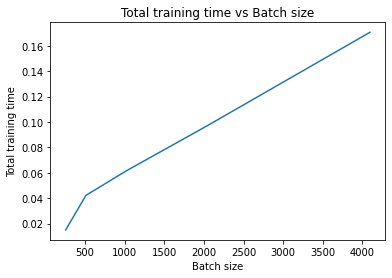

In [148]:
# Plot 3: Total training time vs Batch size

Batch_size = [2**8, 2**9, 2**10, 2**11, 2**12]
Total_time = [Result_1[3][-1], Result_2[3][-1], Result_3[3][-1], Result_4[3][-1], Result_5[3][-1]]

plt.plot(Batch_size, Total_time)
plt.xlabel("Batch size")
plt.ylabel("Total training time")
plt.title("Total training time vs Batch size")
plt.show()

In Plot 1, I found that as the batch size increased, the number of epochs required to attain convergence increased, accompanied with a slower reduction in the RMSE value. In Plot 2, as the batch size increased, the elapsed time for each epoch increased. In Plot 3, it shows that their is a significant increase in total time required for convergence as the batch size increases, however when compared to a full batch gradient descent in Part 3, mini-batch GD is able to converge to lower RMSE values in shorter time when an optimum batch size is chosen.

## Part 5 - Gradient Descent Learning Rate [2 marks]
Use the function that you designed in Part 4 to investigate the effect of learning rate on convergence.

1. Pick 3 batch sizes that do not converge with a learning rate of $\alpha= 0.01$ (last part) and try to find a learning rate that results in convergence for each batch size. Report your findings in a table. Mention batch size, learning rate, and training and validation RMSE. **[0.5]**

2. Select the best batch size based on Part 4's fastest convergence time and sweep the learning rate (at least 10 values, all should converge) while applying Mini-batch GD. 
  
  * Plot the training and validation RMSE vs. **epoch** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Plot the training and validation RMSE vs. **time** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Describe your findings, including the main takeaways from each of your plots. **[0.5]**

In [149]:
# Effect of learning rate on convergence
gradient_descent(X_train_scaled_1f, y_train_array, X_valid_scaled_1f, y_valid_array, CT, 2**0, 0.01)

'Diverging'

In [150]:
Result_1 = gradient_descent(X_train_scaled_1f, y_train_array, X_valid_scaled_1f, y_valid_array, CT, 2**0, 0.001)
Result_1

(array([[-9.31650917e-04, -1.73128812e-05,  3.16693980e-05,
         -1.13333091e-04,  4.28889628e-05,  2.33755376e-05,
         -1.08199777e-04,  2.10661777e-04, -5.07285683e-05,
          2.26129566e-05,  3.25873692e-05, -8.77219001e-06,
         -4.64074654e-05, -7.24538019e-06, -4.16506687e-05,
          1.75636417e-05,  2.58172381e-05, -9.01931023e-06,
          2.70370554e-05, -4.90284128e-05, -4.89454359e-06,
         -5.28334902e-05, -1.51701129e-05, -4.59990146e-05,
         -4.17459139e-05,  5.59616939e-06, -8.40226663e-04,
          1.58565616e-05,  2.38129227e-04, -2.15031340e-06,
         -3.13425782e-04,  1.16493126e-05, -5.14862050e-05,
         -1.77520448e-06,  8.47403196e-04,  2.21008755e-05,
          6.88612309e-04,  7.50496185e-06,  1.80356619e-03,
         -4.46065181e-06,  3.94928966e-05]]),
 [0.002801260789841507],
 [0.00018957377171532045],
 [0.13900446891784668])

In [151]:
gradient_descent(X_train_scaled_1f, y_train_array, X_valid_scaled_1f, y_valid_array, CT, 2**1, 0.01)

'Diverging'

In [152]:
Result_2 = gradient_descent(X_train_scaled_1f, y_train_array, X_valid_scaled_1f, y_valid_array, CT, 2**1, 0.001)
Result_2

(array([[-8.76604798e-04,  4.90818322e-06,  1.60286040e-05,
         -1.32783949e-04,  1.56589899e-05, -2.61819484e-06,
         -7.99546419e-05,  2.44857522e-04, -1.46514549e-05,
          4.20029536e-05,  6.20411180e-06, -1.21740463e-05,
         -4.83243311e-05, -9.90700595e-06, -4.31191615e-05,
          1.70459673e-05,  2.53885128e-05, -1.03441657e-05,
          2.64048264e-05, -4.99700971e-05, -5.21120482e-06,
         -5.01990672e-05, -1.09559539e-05, -4.45880476e-05,
         -3.95047279e-05, -8.58314993e-06, -3.32047840e-04,
         -1.39118523e-06,  9.08765127e-06, -2.68159926e-06,
          1.38012988e-05, -2.94006116e-06, -7.36162339e-05,
         -1.97286786e-06,  2.02140294e-04,  4.32860493e-07,
          2.16405634e-04,  1.61659457e-06,  2.69823733e-04,
          1.28266219e-05,  4.32356098e-05]]),
 [0.0006931187972939242],
 [0.0001720109037728675],
 [0.08936810493469238])

In [153]:
gradient_descent(X_train_scaled_1f, y_train_array, X_valid_scaled_1f, y_valid_array, CT, 2**2, 0.01)

'Diverging'

In [154]:
Result_3 = gradient_descent(X_train_scaled_1f, y_train_array, X_valid_scaled_1f, y_valid_array, CT, 2**2, 0.001)
Result_3

(array([[-7.93951390e-04,  1.71853844e-06,  2.14510552e-05,
         -1.10698579e-04,  1.66960587e-05,  2.60739267e-06,
         -6.24104222e-05,  2.24483592e-04, -4.77421472e-06,
          3.81915530e-05,  1.41715025e-05, -1.49278487e-05,
         -5.10508567e-05, -1.29945879e-05, -4.59347033e-05,
          1.43795187e-05,  2.27412552e-05, -1.28606857e-05,
          2.41135718e-05, -5.24161645e-05, -7.55310797e-06,
         -5.14738006e-05, -1.23653774e-05, -4.51880774e-05,
         -3.99725762e-05, -4.18136601e-06, -8.57286978e-05,
         -1.01814461e-06, -5.63310210e-05, -6.45012190e-07,
         -4.66220780e-07, -8.63061899e-06, -7.61363845e-05,
          1.92026144e-06,  4.81154741e-05, -1.45467858e-06,
          2.48366012e-05,  8.03858162e-06,  3.91565214e-05,
          1.62764334e-05,  4.35488876e-05]]),
 [0.0002700635699659945],
 [0.00019434661700754938],
 [0.0709223747253418])

In [155]:
#1
Batch_size = [2**0, 2**1, 2**2]
Learning_rate = [0.001, 0.001, 0.001]
Training_rmse = [Result_1[1][0], Result_2[1][0], Result_3[1][0]]
Validation_rmse = [Result_1[2][0], Result_2[2][0], Result_3[2][0]]
zipped = list(zip(Batch_size, Learning_rate, Training_rmse, Validation_rmse))
df = pd.DataFrame(zipped, columns=['Batch size', 'Learning rate', 'Training RMSE', 'Validation RMSE'])
df

,Batch size,Learning rate,Training RMSE,Validation RMSE
0,1,0.001,0.002801,0.000190
1,2,0.001,0.000693,0.000172
2,4,0.001,0.000270,0.000194


In [156]:
# 2
# Best batch size 2**8 from Part 4 based on convergence time
# Sweeping different values for learning rate
Result_1 = gradient_descent(X_train_scaled_1f, y_train_array, X_valid_scaled_1f, y_valid_array, CT, 2**8, 0.009)
Result_1

(array([[-4.12504263e-04, -1.28501373e-05,  4.09259029e-05,
         -4.32291993e-05,  2.16294798e-05,  1.39946473e-05,
         -1.37527489e-05,  1.51752438e-04,  1.30142662e-05,
          2.78740827e-05,  4.36377605e-05, -1.24866107e-05,
         -5.00656721e-05, -1.21684602e-05, -4.48550398e-05,
          1.52999640e-05,  2.32861906e-05, -1.24872794e-05,
          2.41644420e-05, -5.24931707e-05, -7.85327421e-06,
         -5.16325880e-05, -1.32130220e-05, -4.61015781e-05,
         -4.12096646e-05,  2.42306405e-05,  2.28359225e-05,
         -1.94510194e-09, -8.46342663e-06,  1.03477295e-05,
          1.27659946e-05, -5.20858475e-06,  1.62419261e-05,
          1.24185307e-05,  2.58748422e-05,  5.49297312e-06,
          3.27099612e-05,  2.46780262e-05, -9.02754710e-06,
          1.68277479e-05,  4.25903662e-05]]),
 [0.0007087895972435911, 0.0005176478141477463],
 [0.000700194759666917, 0.0005114548043173721],
 [0.015976667404174805, 0.03135180473327637])

In [157]:
Result_2 = gradient_descent(X_train_scaled_1f, y_train_array, X_valid_scaled_1f, y_valid_array, CT, 2**8, 0.008)
Result_2

(array([[-3.75703205e-04, -1.31871828e-05,  4.23167683e-05,
         -3.67646169e-05,  2.16915968e-05,  1.38455679e-05,
         -1.00522044e-05,  1.46010802e-04,  1.47737687e-05,
          2.71246089e-05,  4.60336352e-05, -1.23210141e-05,
         -5.00342808e-05, -1.21376781e-05, -4.48259232e-05,
          1.53264797e-05,  2.32473178e-05, -1.25376329e-05,
          2.40507762e-05, -5.26097711e-05, -8.07712981e-06,
         -5.18712014e-05, -1.35534664e-05, -4.64630568e-05,
         -4.16549154e-05,  2.69287736e-05,  2.32523831e-05,
          4.38943810e-07, -6.92890048e-06,  1.18499629e-05,
          1.46070621e-05, -4.03702440e-06,  1.95186910e-05,
          1.44315646e-05,  2.76248863e-05,  7.12933803e-06,
          3.64575046e-05,  2.65093969e-05, -7.28027674e-06,
          1.64048102e-05,  4.21422294e-05]]),
 [0.000735235540441527, 0.0005541521704498975],
 [0.0007260083006003596, 0.0005475885045836394],
 [0.01306462287902832, 0.020686626434326172])

In [158]:
Result_3 = gradient_descent(X_train_scaled_1f, y_train_array, X_valid_scaled_1f, y_valid_array, CT, 2**8, 0.007)
Result_3

(array([[-4.62075430e-04, -1.18597821e-05,  3.91173397e-05,
         -5.21127409e-05,  2.12949873e-05,  1.39342547e-05,
         -1.83585691e-05,  1.59723944e-04,  1.06725020e-05,
          2.87674933e-05,  4.02517448e-05, -1.24986784e-05,
         -4.99152534e-05, -1.20142033e-05, -4.47052274e-05,
          1.54489226e-05,  2.35279836e-05, -1.22386973e-05,
          2.44802689e-05, -5.21782759e-05, -7.39199620e-06,
         -5.11761417e-05, -1.26127016e-05, -4.54839460e-05,
         -4.04504370e-05,  2.08351011e-05,  2.02203558e-05,
         -1.95787231e-07, -8.56080780e-06,  8.43033615e-06,
          1.11084955e-05, -6.74183004e-06,  1.58636726e-05,
          9.87379753e-06,  2.63270304e-05,  3.26085650e-06,
          2.94993239e-05,  2.22379926e-05, -9.87211482e-06,
          1.75296077e-05,  4.33516069e-05]]),
 [0.0007628922605419189, 0.0005939731523813535, 0.0004695468287381387],
 [0.0007529601463341428, 0.0005868981694914973, 0.00046345484098974266],
 [0.007680416107177734, 0.015

In [159]:
Result_4 = gradient_descent(X_train_scaled_1f, y_train_array, X_valid_scaled_1f, y_valid_array, CT, 2**8, 0.006)
Result_4

(array([[-4.11955188e-04, -1.27131739e-05,  4.11496761e-05,
         -4.33109779e-05,  2.15695550e-05,  1.41131884e-05,
         -1.31894292e-05,  1.51695952e-04,  1.29446115e-05,
          2.76312036e-05,  4.36660444e-05, -1.21949721e-05,
         -4.97838107e-05, -1.18844822e-05, -4.45687315e-05,
          1.55839632e-05,  2.35798128e-05, -1.22005428e-05,
          2.44450821e-05, -5.22167560e-05, -7.56533436e-06,
         -5.13645437e-05, -1.29286351e-05, -4.58258035e-05,
         -4.09009904e-05,  2.43865724e-05,  2.13984014e-05,
          2.07837813e-07, -7.04334990e-06,  1.03134005e-05,
          1.33391165e-05, -5.33970342e-06,  1.96532666e-05,
          1.24115863e-05,  2.81113774e-05,  5.27319093e-06,
          3.41439040e-05,  2.46214854e-05, -7.89726570e-06,
          1.71129223e-05,  4.28978023e-05]]),
 [0.0007918915256205395, 0.0006373997154158126, 0.00051855612753515],
 [0.0007811844773387836, 0.0006296435855489255, 0.0005120855956901235],
 [0.004240989685058594, 0.011965

In [160]:
Result_5 = gradient_descent(X_train_scaled_1f, y_train_array, X_valid_scaled_1f, y_valid_array, CT, 2**8, 0.005)
Result_5

(array([[-4.45706667e-04, -1.22379547e-05,  3.97438420e-05,
         -4.92863613e-05,  2.09927891e-05,  1.39743234e-05,
         -1.67511913e-05,  1.57126370e-04,  1.18212153e-05,
          2.85106910e-05,  4.13809376e-05, -1.25704794e-05,
         -5.00615605e-05, -1.21634730e-05, -4.48511374e-05,
          1.53023705e-05,  2.33424254e-05, -1.24326012e-05,
          2.42509798e-05, -5.24103848e-05, -7.65863461e-06,
         -5.14445176e-05, -1.29188710e-05, -4.58008457e-05,
         -4.07873651e-05,  2.21929482e-05,  2.22385427e-05,
          1.58429462e-08, -7.41976231e-06,  9.28912940e-06,
          1.23051081e-05, -6.08815495e-06,  1.86468676e-05,
          1.06539748e-05,  2.64061730e-05,  3.84302461e-06,
          3.13656610e-05,  2.29941377e-05, -8.80486229e-06,
          1.72000134e-05,  4.30126218e-05]]),
 [0.0008226085648846621,
  0.0006847542983921251,
  0.000574412495839106,
  0.0004855881899898176],
 [0.0008110552728327244,
  0.0006761174388429758,
  0.0005673301281293121,

In [161]:
Result_6 = gradient_descent(X_train_scaled_1f, y_train_array, X_valid_scaled_1f, y_valid_array, CT, 2**8, 0.004)
Result_6

(array([[-3.75009793e-04, -1.31548899e-05,  4.25456967e-05,
         -3.67992824e-05,  2.13440873e-05,  1.39701427e-05,
         -9.56479803e-06,  1.46001164e-04,  1.50657984e-05,
          2.69502163e-05,  4.60726927e-05, -1.21069692e-05,
         -4.98459621e-05, -1.19492585e-05, -4.46305735e-05,
          1.55199796e-05,  2.34389240e-05, -1.23564144e-05,
          2.42114890e-05, -5.24541853e-05, -7.90669172e-06,
         -5.17171260e-05, -1.33853994e-05, -4.63034101e-05,
         -4.14590646e-05,  2.72746247e-05,  2.31881346e-05,
          6.42669306e-07, -5.09442148e-06,  1.20545289e-05,
          1.57519811e-05, -3.86955067e-06,  2.39177390e-05,
          1.44404278e-05,  2.92890745e-05,  6.89984837e-06,
          3.78763344e-05,  2.65276697e-05, -5.79380224e-06,
          1.65694648e-05,  4.23355438e-05]]),
 [0.0008562954961582569,
  0.0007364046606265471,
  0.0006380172035968934,
  0.0005553541757096301],
 [0.000843798845402684,
  0.0007266612387573398,
  0.0006300071651542492,

In [162]:
Result_7 = gradient_descent(X_train_scaled_1f, y_train_array, X_valid_scaled_1f, y_valid_array, CT, 2**8, 0.003)
Result_7

(array([[-4.11390046e-04, -1.29538894e-05,  4.13555323e-05,
         -4.32676938e-05,  2.12285124e-05,  1.42034563e-05,
         -1.29825322e-05,  1.51755902e-04,  1.33314415e-05,
          2.74721063e-05,  4.35205289e-05, -1.23617881e-05,
         -4.99713620e-05, -1.20751607e-05, -4.47355224e-05,
          1.54155693e-05,  2.34028320e-05, -1.23861125e-05,
          2.42360101e-05, -5.24284213e-05, -7.76505570e-06,
         -5.15629505e-05, -1.31341061e-05, -4.60350350e-05,
         -4.10926068e-05,  2.46434109e-05,  2.35278050e-05,
         -1.24504060e-07, -5.61022911e-06,  1.04524439e-05,
          1.46127935e-05, -4.96683840e-06,  2.23741374e-05,
          1.24099722e-05,  2.76990172e-05,  5.21251883e-06,
          3.48385901e-05,  2.47153890e-05, -6.58063745e-06,
          1.69191413e-05,  4.27027393e-05]]),
 [0.000897267994960491,
  0.0007929299195934904,
  0.0007104563850217874,
  0.0006383082941508454,
  0.000575034875893954,
  0.0005194126776756666],
 [0.0008836018460464872,


In [163]:
Result_8 = gradient_descent(X_train_scaled_1f, y_train_array, X_valid_scaled_1f, y_valid_array, CT, 2**8, 0.002)
Result_8

(array([[-3.74711898e-04, -1.33398816e-05,  4.28705856e-05,
         -3.68040724e-05,  2.13063262e-05,  1.40277716e-05,
         -9.17842641e-06,  1.46084302e-04,  1.51513756e-05,
          2.66383659e-05,  4.58660089e-05, -1.22503012e-05,
         -4.99959982e-05, -1.21005175e-05, -4.47550264e-05,
          1.53940505e-05,  2.33136432e-05, -1.24879959e-05,
          2.40655286e-05, -5.26014288e-05, -8.04840707e-06,
         -5.18606506e-05, -1.35322450e-05, -4.64516285e-05,
         -4.16034953e-05,  2.73722931e-05,  2.40189812e-05,
          1.93284571e-07, -4.12619439e-06,  1.20327886e-05,
          1.68054959e-05, -3.65772124e-06,  2.55706736e-05,
          1.44912359e-05,  2.93219952e-05,  6.78160510e-06,
          3.82227570e-05,  2.66975112e-05, -4.71530218e-06,
          1.64383121e-05,  4.21884039e-05]]),
 [0.0009600332155345227,
  0.0008573517032701175,
  0.0007932994617323517,
  0.0007369589608570938,
  0.0006856374501003913,
  0.0006385849750324869,
  0.0005954436185087994,

In [164]:
Result_9 = gradient_descent(X_train_scaled_1f, y_train_array, X_valid_scaled_1f, y_valid_array, CT, 2**8, 0.001)
Result_9

(array([[-3.74581185e-04, -1.33495591e-05,  4.28977495e-05,
         -3.67105312e-05,  2.13623862e-05,  1.41676692e-05,
         -9.17919683e-06,  1.45916753e-04,  1.51900792e-05,
          2.66915486e-05,  4.59381511e-05, -1.20219595e-05,
         -4.97736304e-05, -1.18785695e-05, -4.45226386e-05,
          1.56256447e-05,  2.35534319e-05, -1.22508320e-05,
          2.42923463e-05, -5.23753184e-05, -7.82363363e-06,
         -5.16374679e-05, -1.33148736e-05, -4.62347112e-05,
         -4.13836496e-05,  2.75133876e-05,  2.43108485e-05,
          3.58542198e-08, -3.74153126e-06,  1.19334038e-05,
          1.72198383e-05, -3.47397791e-06,  2.63307416e-05,
          1.45182759e-05,  2.94103677e-05,  6.80643297e-06,
          3.83044339e-05,  2.68083579e-05, -4.39200090e-06,
          1.66651979e-05,  4.24076318e-05]]),
 [0.0010894971467224404,
  0.0009614998384578021,
  0.0008992154619485206,
  0.0008580166610835621,
  0.0008242626282827209,
  0.0007935056794014174,
  0.0007646101730969952,

In [165]:
Result_10 = gradient_descent(X_train_scaled_1f, y_train_array, X_valid_scaled_1f, y_valid_array, CT, 2**8, 0.0009)
Result_10

(array([[-3.78339799e-04, -1.33371403e-05,  4.27672551e-05,
         -3.73538715e-05,  2.13824694e-05,  1.42190367e-05,
         -9.55559380e-06,  1.46469745e-04,  1.49989132e-05,
          2.67751116e-05,  4.57304803e-05, -1.20045820e-05,
         -4.97408583e-05, -1.18458082e-05, -4.44884640e-05,
          1.56599903e-05,  2.35918238e-05, -1.22116166e-05,
          2.43387775e-05, -5.23287510e-05, -7.76796749e-06,
         -5.15805718e-05, -1.32452339e-05, -4.61632177e-05,
         -4.13024988e-05,  2.72241551e-05,  2.43189796e-05,
         -2.61800960e-08, -3.83547803e-06,  1.18053487e-05,
          1.70704675e-05, -3.59951986e-06,  2.61405247e-05,
          1.43220800e-05,  2.92552360e-05,  6.60453268e-06,
          3.79696171e-05,  2.66300865e-05, -4.52128948e-06,
          1.67352469e-05,  4.24890063e-05]]),
 [0.0011096946403050451,
  0.000979707725481881,
  0.0009147064214498244,
  0.0008732292131989163,
  0.0008406702968528356,
  0.000811679164884392,
  0.0007846727293611478,
 

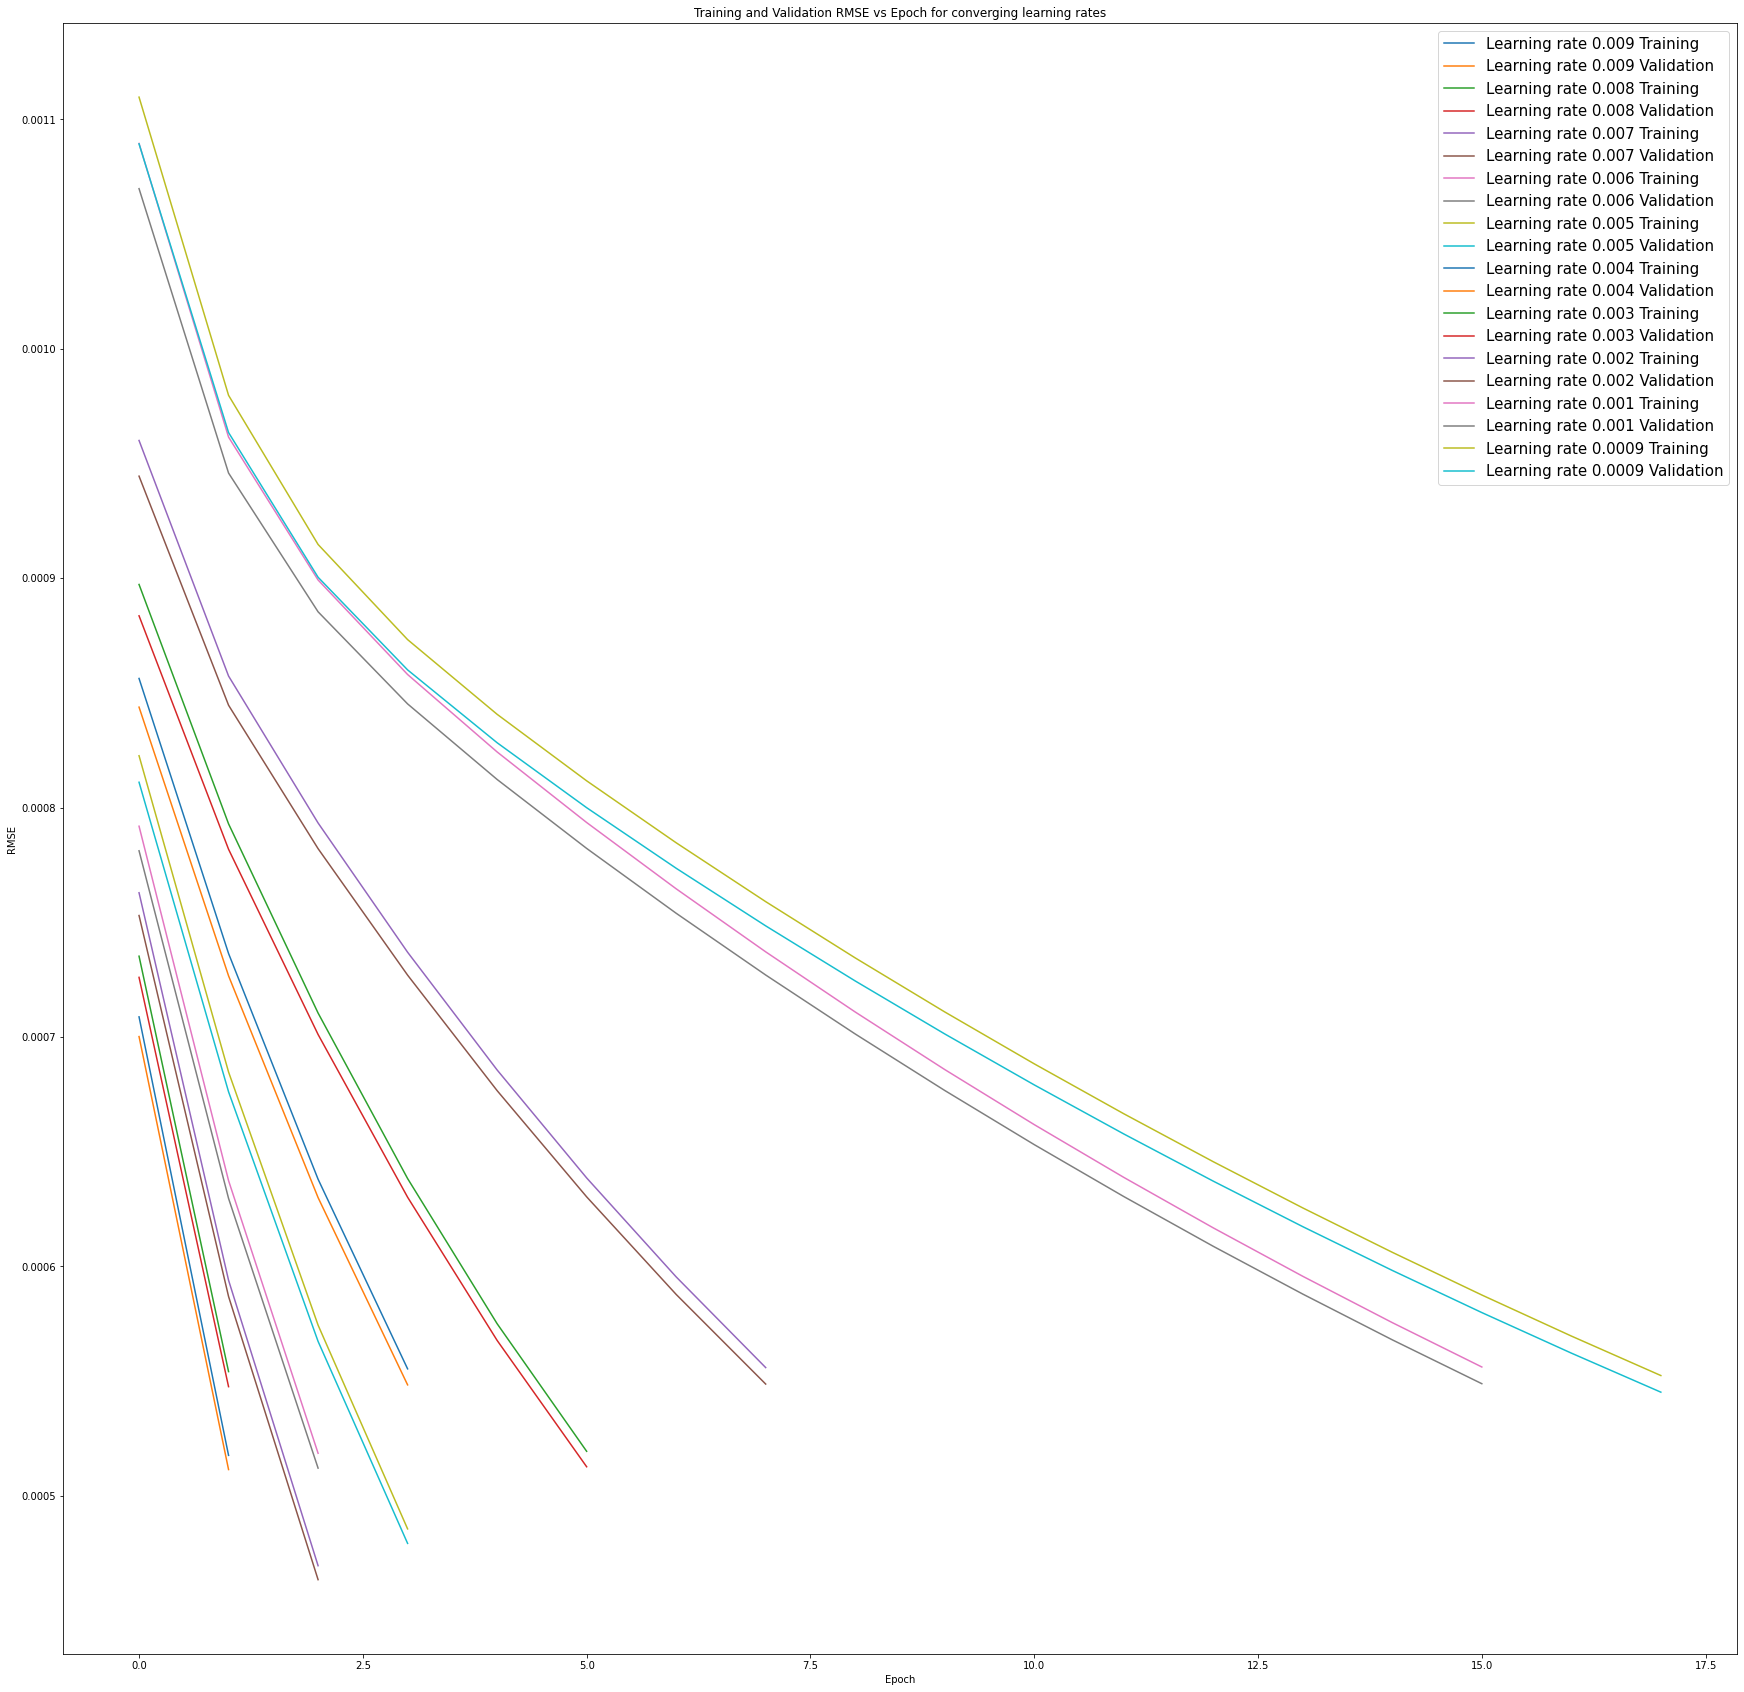

In [166]:
# Plot 1
# Training and validation RMSE vs Epoch for converging leraning rates
import matplotlib.pyplot as plt

plt.figure(figsize=(30,30))
plt.plot(Result_1[1], label='Learning rate 0.009 Training')
plt.plot(Result_1[2], label='Learning rate 0.009 Validation')
plt.plot(Result_2[1], label='Learning rate 0.008 Training')
plt.plot(Result_2[2], label='Learning rate 0.008 Validation')
plt.plot(Result_3[1], label='Learning rate 0.007 Training')
plt.plot(Result_3[2], label='Learning rate 0.007 Validation')
plt.plot(Result_4[1], label='Learning rate 0.006 Training')
plt.plot(Result_4[2], label='Learning rate 0.006 Validation')
plt.plot(Result_5[1], label='Learning rate 0.005 Training')
plt.plot(Result_5[2], label='Learning rate 0.005 Validation')
plt.plot(Result_6[1], label='Learning rate 0.004 Training')
plt.plot(Result_6[2], label='Learning rate 0.004 Validation')
plt.plot(Result_7[1], label='Learning rate 0.003 Training')
plt.plot(Result_7[2], label='Learning rate 0.003 Validation')
plt.plot(Result_8[1], label='Learning rate 0.002 Training')
plt.plot(Result_8[2], label='Learning rate 0.002 Validation')
plt.plot(Result_9[1], label='Learning rate 0.001 Training')
plt.plot(Result_9[2], label='Learning rate 0.001 Validation')
plt.plot(Result_10[1], label='Learning rate 0.0009 Training')
plt.plot(Result_10[2], label='Learning rate 0.0009 Validation')
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.title("Training and Validation RMSE vs Epoch for converging learning rates")
plt.legend()
plt.legend(fontsize=15)
plt.show()


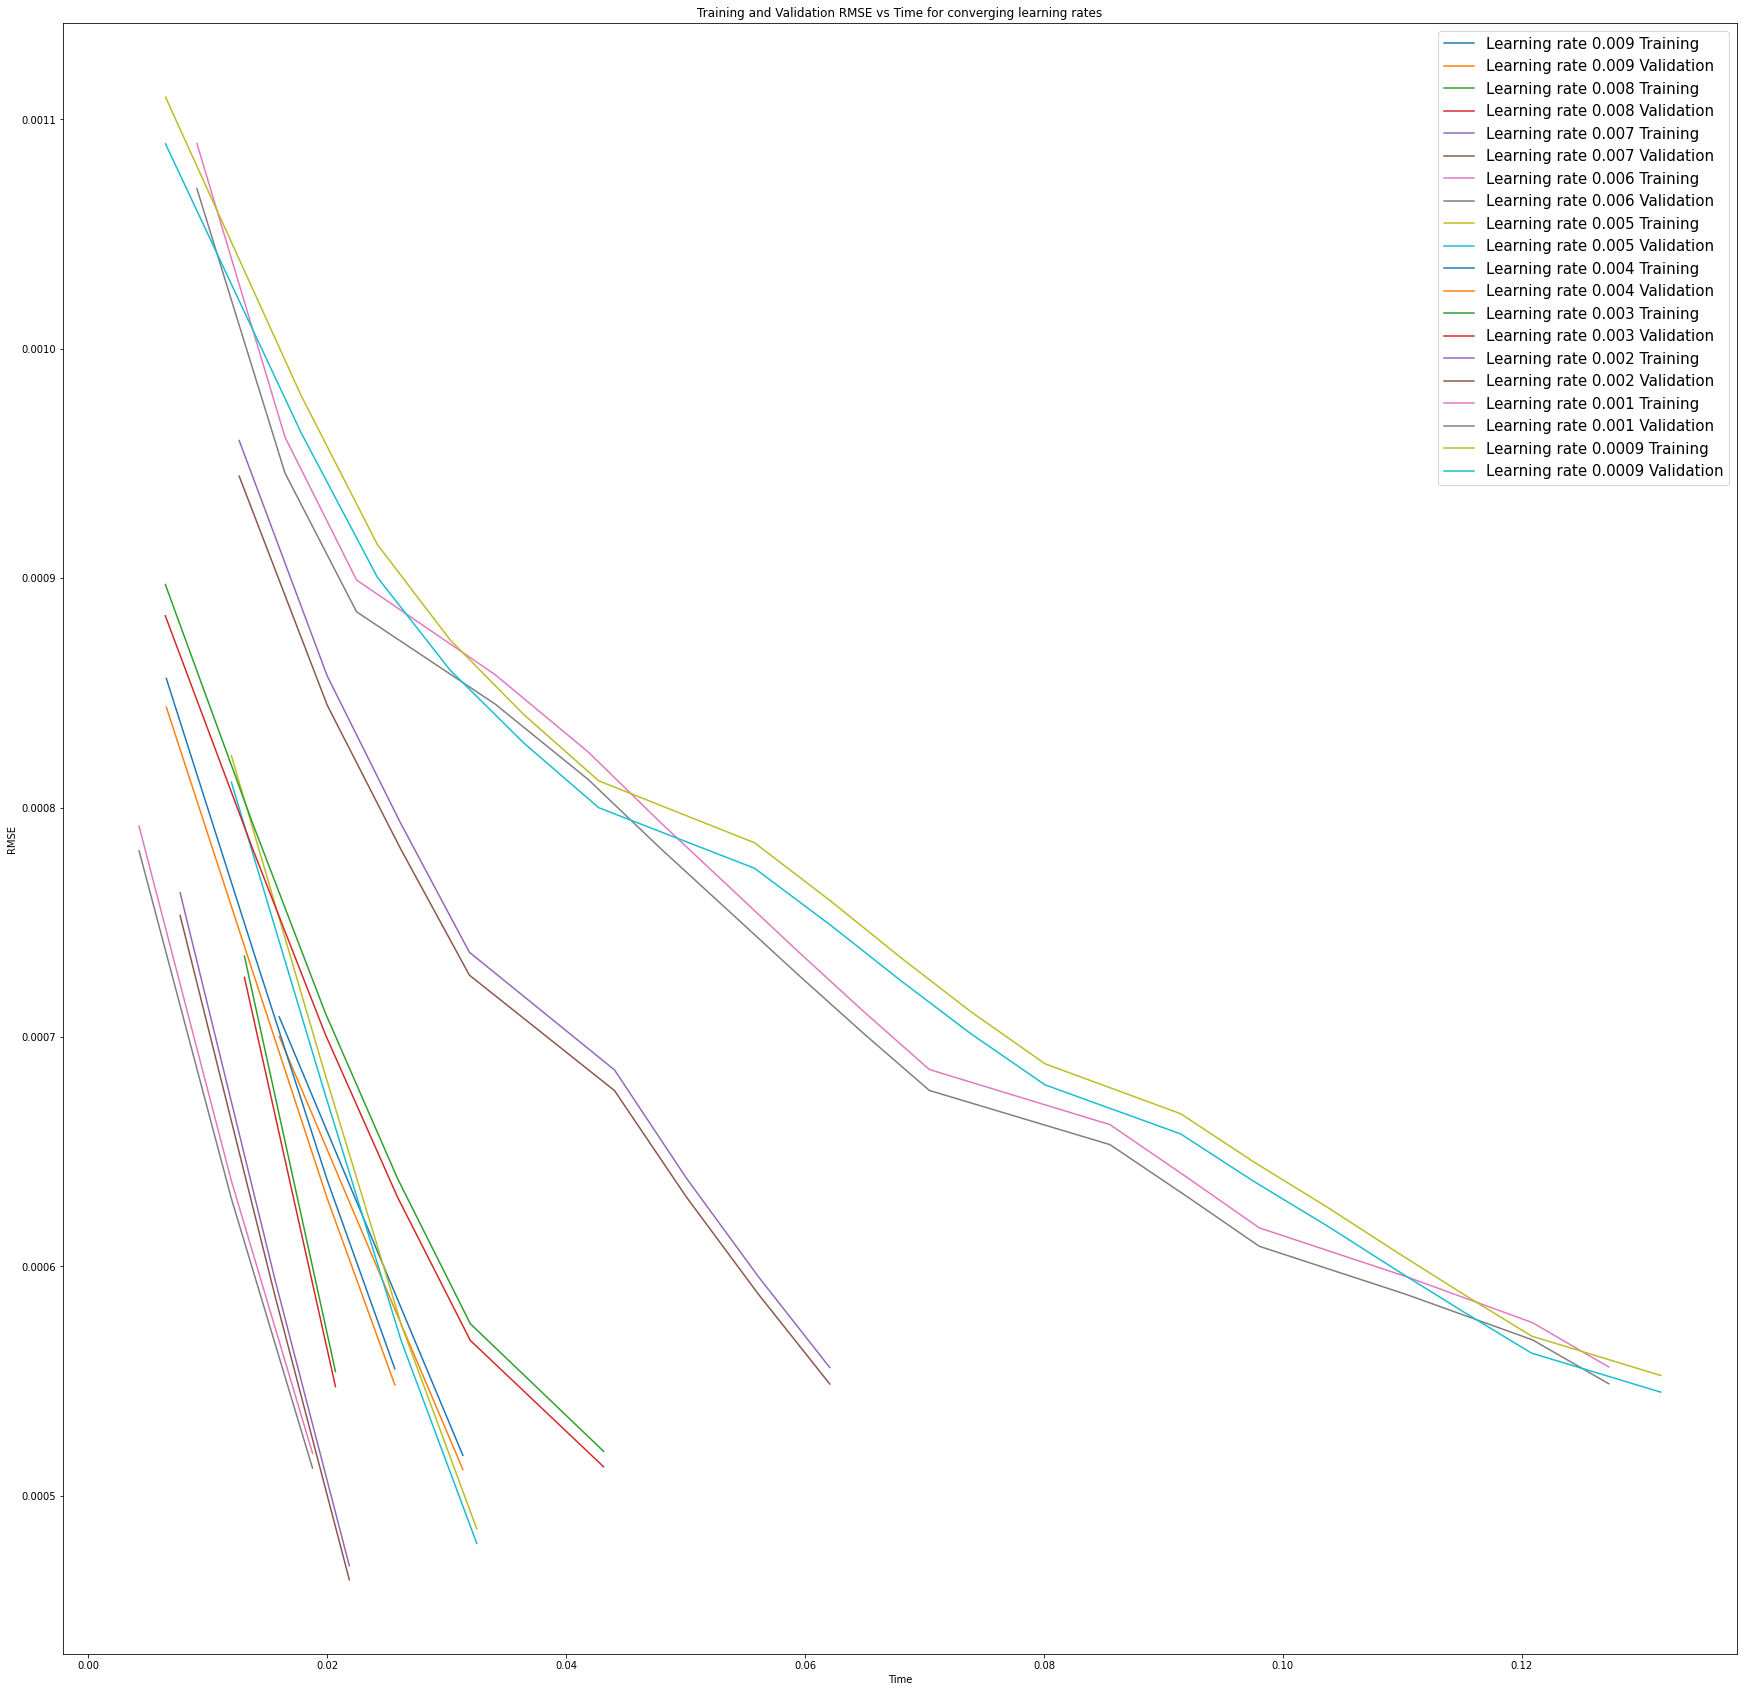

In [167]:
# Plot 2
# Training and validation RMSE vs Time for converging learning rates
import matplotlib.pyplot as plt

plt.figure(figsize=(30,30))
plt.plot(Result_1[3], Result_1[1], label='Learning rate 0.009 Training')
plt.plot(Result_1[3], Result_1[2], label='Learning rate 0.009 Validation')
plt.plot(Result_2[3], Result_2[1], label='Learning rate 0.008 Training')
plt.plot(Result_2[3], Result_2[2], label='Learning rate 0.008 Validation')
plt.plot(Result_3[3], Result_3[1], label='Learning rate 0.007 Training')
plt.plot(Result_3[3], Result_3[2], label='Learning rate 0.007 Validation')
plt.plot(Result_4[3], Result_4[1], label='Learning rate 0.006 Training')
plt.plot(Result_4[3], Result_4[2], label='Learning rate 0.006 Validation')
plt.plot(Result_5[3], Result_5[1], label='Learning rate 0.005 Training')
plt.plot(Result_5[3], Result_5[2], label='Learning rate 0.005 Validation')
plt.plot(Result_6[3], Result_6[1], label='Learning rate 0.004 Training')
plt.plot(Result_6[3], Result_6[2], label='Learning rate 0.004 Validation')
plt.plot(Result_7[3], Result_7[1], label='Learning rate 0.003 Training')
plt.plot(Result_7[3], Result_7[2], label='Learning rate 0.003 Validation')
plt.plot(Result_8[3], Result_8[1], label='Learning rate 0.002 Training')
plt.plot(Result_8[3], Result_8[2], label='Learning rate 0.002 Validation')
plt.plot(Result_9[3], Result_9[1], label='Learning rate 0.001 Training')
plt.plot(Result_9[3], Result_9[2], label='Learning rate 0.001 Validation')
plt.plot(Result_10[3], Result_10[1], label='Learning rate 0.0009 Training')
plt.plot(Result_10[3], Result_10[2], label='Learning rate 0.0009 Validation')
plt.xlabel("Time")
plt.ylabel("RMSE")
plt.title("Training and Validation RMSE vs Time for converging learning rates")
plt.legend()
plt.legend(fontsize=15)
plt.show()


In Plot 1, I observed that as the learning rates decreased slightly, the number of epochs required for convergence increased significantly, accompanied with a smaller reduction of the RMSE value. In Plot 2, as the learning rates decreased, beacause the number of epochs required for convergence increased as observed in Plot 1, the elapsed time for each epoch and by extension the total time taken for convergence also increased. In summary as learning rates decreases, more epoch are needed for convergence and the total time taken increases.

## Part 6 - Finalizing a model [2 marks]
Based on your findings from the previous parts, pick a model (or combination of model settings) that you think would work best for our dataset and evaluate it on the test set. 

Briefly describe your model selections/settings. **[1]** 

Summarize the performance of your model for the task of managing ailerons of an aircraft. **[1]** 

In [168]:
# Finalized model
import time
import matplotlib.pyplot as plt

def final_model(X_train_scaled_1f, y_train_array, X_test_scaled_1f, y_test_array, CT, b, lr):
  np.random.seed(2)
  w_min = 1 / 10000
  w = w_min * (np.random.random(X_train_scaled_1f.shape[1])).reshape(1,-1)            
  rmse_test = 0.1 + CT                                       
  rmse_array_train = []
  rmse_array_test = []
  elapsed_time_epoch = []
  batch_size_array = np.arange(0, X_train_scaled_1f.shape[0] , b)           # Creates mini-batch array
 
  start_time = time.time()                                                 # Records start time
  while rmse_test > CT:                                                    # Iterates through epoch
    for i in batch_size_array:                                             # Iterates through mini-batches, a complete iteration forms an epoch
      yPred_batch = np.dot(X_train_scaled_1f[i:i+b], w.T)
      gradient = (1/len(yPred_batch) * np.dot(X_train_scaled_1f[i:i+b].T, (yPred_batch - y_train_array[i:i+b]))).reshape(1,-1)
      w = w - lr * gradient
    yPred_train = np.dot(X_train_scaled_1f, w.T)    
    rmse_train = rmse(yPred_train, y_train_array)  
    rmse_array_train.append(rmse_train)
    yPred_test = np.dot(X_test_scaled_1f, w.T)
    rmse_test = rmse(yPred_test, y_test_array)
    rmse_array_test.append(rmse_test)
    stop_time = time.time()
    elapsed_time = stop_time - start_time
    elapsed_time_epoch.append(elapsed_time)
    full_data = np.hstack((X_train_scaled_1f, y_train_array))   
    full_data_shuffle = np.random.permutation(full_data)            # Shuffles dataset at the end of each epoch
    X_train_scaled_1f = full_data_shuffle[:, :-1]
    y_train_array = full_data_shuffle[:, -1].reshape(-1, 1)  
  return w, rmse_array_train, rmse_array_test, elapsed_time_epoch

In [169]:
final_model(X_train_scaled_1f, y_train_array, X_test_scaled_1f, y_test_array, CT, 2**8, 0.01)

(array([[-4.46624153e-04, -1.23507365e-05,  3.95787403e-05,
         -4.91907778e-05,  2.15122246e-05,  1.39866843e-05,
         -1.72919186e-05,  1.57173796e-04,  1.14442239e-05,
          2.86454872e-05,  4.13399033e-05, -1.25932674e-05,
         -5.00529533e-05, -1.21549904e-05, -4.48431004e-05,
          1.53138819e-05,  2.33564236e-05, -1.24076744e-05,
          2.42957966e-05, -5.23590546e-05, -7.62793888e-06,
         -5.13940166e-05, -1.28885449e-05, -4.57579495e-05,
         -4.07952240e-05,  2.17855509e-05,  2.23237625e-05,
         -3.42539496e-07, -9.67942452e-06,  9.04735962e-06,
          1.13267479e-05, -6.15798699e-06,  1.33739915e-05,
          1.06763484e-05,  2.42969818e-05,  4.11030565e-06,
          2.93047858e-05,  2.30630658e-05, -1.04606747e-05,
          1.72174527e-05,  4.30067656e-05]]),
 [0.0006834883774365876, 0.00048420047989677],
 [0.0006816119379550948, 0.0004794587010314427],
 [0.015269994735717773, 0.027843713760375977])

Model settings/selection: My final model implements a mini-batch gradient descent with a batch size of 256 and a learning rate of 0.01 which emerged as the best model settings in terms of minimum validation RMSE value and total convergence time in Part 4

Performance: The performance of the model was evaluated based on the RMSE on the test set which was found to be **0.000479**, which is 1.145 lower than the convergence threshold. It is also able to converge to a solution in about 0.0561 seconds or less with only two epochs. This indicates that the model has a high capacity and speed to correctly predict the goal for accurate control of the ailerons of the aircraft. In addition to this, the training of the model is also computationally efficient when compared to other model setting investigated in this project.

## Part 7 - Getting started with Github  [3 marks]

This final part of the project assignment is to be completed independently from Parts 1 - 6. In this part you will be completing some additional coding tasks using a different dataset and submitting your results on Github. To access this part of the assignment and upload your answers, you will need to use Github. Please complete the following step-by-step instructions:

 0. Create a Github account and install git for Windows or Mac: 
  * https://git-scm.com/download/win
  * https://git-scm.com/download/mac

 1. Open this link: https://classroom.github.com/a/9rz9Cbqo to create your assignment repository in GitHub. You should get a link similar to:
```
https://github.com/APS-1070-2021/project4_git-*********
```
This your private repository to get this part questions and upload your answers. **Copy this link to the text box below to be graded for this part.**

 
 2. Open `Git Bash`, the app you downloaded in step `0`, and set your Email and username by:
```
git config --global user.email “your GitHub email”
git config --global user.name “your GitHub username”
```

 3. Create a folder for the course on your computer and `cd` to that. `cd` means `Change Directory`. For example, on a Windows machine, where I have a folder on "C:\aps1070":
 ```
cd c:aps1070
```
 4. Get your assignment by the link you got in step 1:
```
git clone https://github.com/APS-1070-2021/project4_git-*********
```


 5. A new folder should be created in your directory similar to:
```
C:\aps1070\project4_git-********
```
This folder has an `ipynb` notebook which you need to manually upload to colab and answer its questions. 

 6. After you finished working on this notebook, download the notebook from colab and move it to the directory in step 5.

 7. Replace the old notebook with the new one that has your answers. Make sure your completed notebook has the same name as the original notebook you downloaded. 

 8. To submit your work, follow: 
```
cd "your assignment folder"
git add S22_Project_4_git.ipynb
git commit -m “Final Submission”
git push 
```
If you had any problem with pushing your work on GitHub you can try one of following commands:
```
git push --force
or 
git push origin HEAD:main
```

 9. Make sure your submission is ready for grading. Open the private repository link in your browser and make sure you can see your final submission with your latest changes there. **Only you and the teaching team can open that link.** 

https://github.com/APS-1070-2021/project-4-Yusuf-Olonade